In [28]:
#Load the dataset
batch_size = 128
number_of_epochs = 5
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense

train_dir = 'images/train/'
validation_dir = 'images/validation/'
image_size = (48, 48)
input_shape = (48, 48, 1)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_dir,  # Update this path to where your test data is stored
    target_size=(48, 48),       # Ensure this matches the input size expected by your model
    batch_size=batch_size,      # You can use the same batch size as for training and validation
    color_mode='rgb',           # Or 'grayscale', depending on your model configuration
    class_mode='categorical',   # This should match your training configuration
    shuffle=False               # Shuffling is not necessary for testing
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size= batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

Found 28821 images belonging to 7 classes.
Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Number of classes: 7


In [29]:
# Initialize the base model, here we're using VGG16 as a base
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model

img_width, img_height = 48, 48


base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Adjust the number of neurons to match the number of classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),  # Use 'learning_rate' instead of 'lr'
    metrics=['accuracy']
)

# Model summary

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 196s 866ms/step - accuracy: 0.2148 - loss: 1.9085 - val_accuracy: 0.3163 - val_loss: 1.6835
Epoch 2/5
  1/225 ━━━━━━━━━━━━━━━━━━━━ 3:00 804ms/step - accuracy: 0.2344 - loss: 1.8572

2024-04-22 21:24:30.640097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-22 21:24:30.829933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.2344 - loss: 0.9327 - val_accuracy: 0.3462 - val_loss: 0.7792
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 210s 933ms/step - accuracy: 0.2792 - loss: 1.7548 - val_accuracy: 0.3442 - val_loss: 1.6502
Epoch 4/5
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:42 725ms/step - accuracy: 0.3125 - loss: 1.7163

2024-04-22 21:28:01.923873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 21:28:02.115923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.3125 - loss: 0.8620 - val_accuracy: 0.2692 - val_loss: 0.9122
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 204s 905ms/step - accuracy: 0.3025 - loss: 1.7178 - val_accuracy: 0.3338 - val_loss: 1.6451


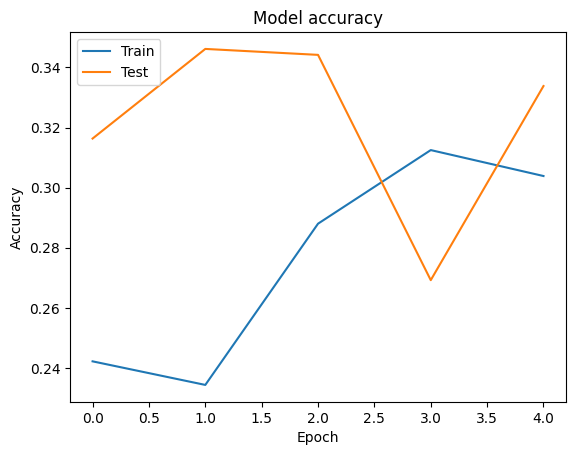

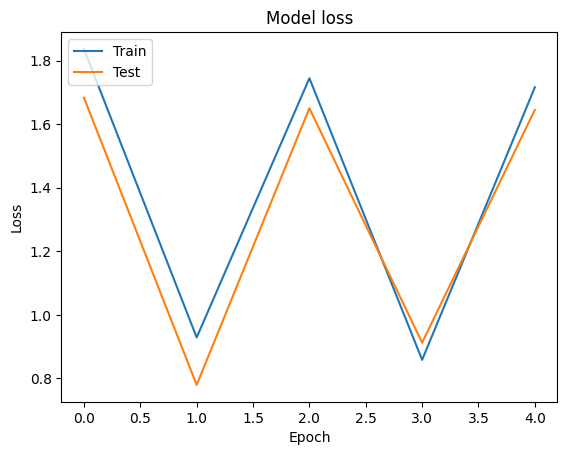

226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 723ms/step - accuracy: 0.2362 - loss: 1.7988
test loss, test acc: [1.6548545360565186, 0.3310433328151703]
226/226 ━━━━━━━━━━━━━━━━━━━━ 166s 735ms/step


In [30]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=number_of_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


results = model.evaluate(test_generator)
print("test loss, test acc:", results)

predictions = model.predict(test_generator, steps=len(test_generator))

              precision    recall  f1-score   support

       angry       0.36      0.02      0.03      3993
     disgust       0.00      0.00      0.00       436
        fear       0.33      0.05      0.09      4103
       happy       0.30      0.88      0.45      7164
     neutral       0.35      0.22      0.27      4982
         sad       0.40      0.08      0.13      4938
    surprise       0.46      0.46      0.46      3205

    accuracy                           0.33     28821
   macro avg       0.31      0.24      0.21     28821
weighted avg       0.35      0.33      0.25     28821

Accuracy for 'Happy' faces: 0.4697616321432289


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

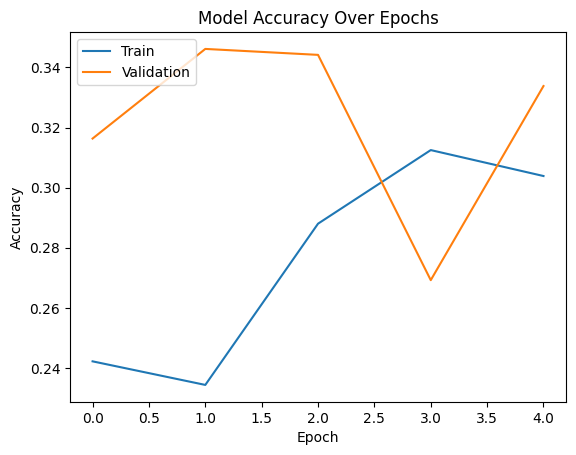

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

In [31]:
predicted_classes = np.argmax(predictions, axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())  # Swapping keys and values
predicted_labels = [labels[k] for k in predicted_classes]


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# If you have true labels in numeric format
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# For a simpler accuracy metric focused on 'happy'
happy_index = test_generator.class_indices['happy']
is_happy_true = (true_classes == happy_index)
is_happy_pred = (predicted_classes == happy_index)
happy_accuracy = accuracy_score(is_happy_true, is_happy_pred)
print("Accuracy for 'Happy' faces:", happy_accuracy)

import matplotlib.pyplot as plt

# Assuming you have accuracy history from training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting confusion matrix as a heatmap
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

{'happy': 7164, 'sad': 4938, 'fear': 4103, 'surprise': 3205, 'neutral': 4982, 'angry': 3993, 'disgust': 436}


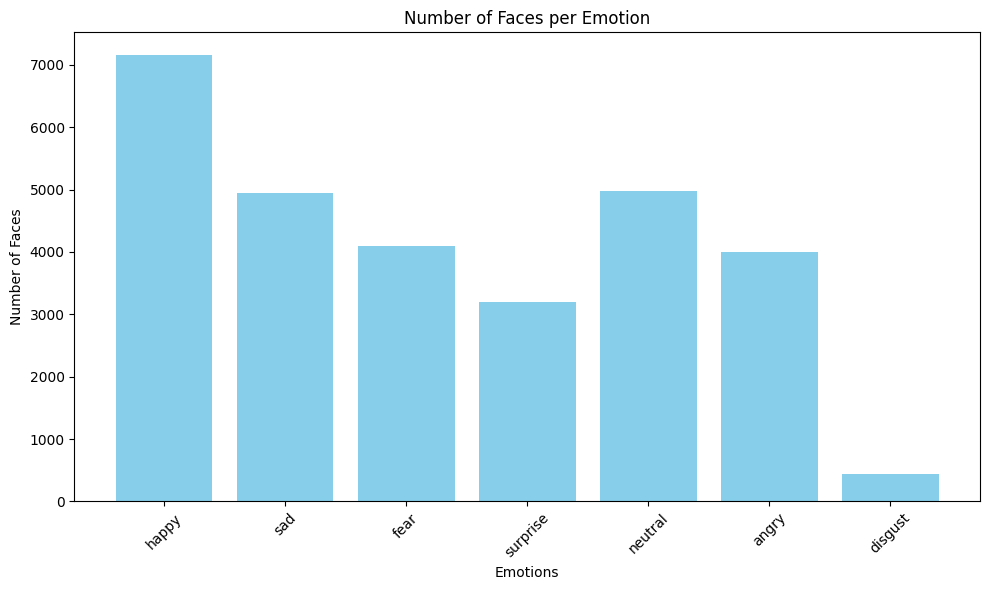

In [35]:
import os
emotions_count = {}

# Iterate over each subdirectory in the dataset directory
for emotion in os.listdir(train_dir):
    emotion_dir = os.path.join(train_dir, emotion)
    if os.path.isdir(emotion_dir):  # Check if it is a directory
        # Count the number of image files in the directory
        emotions_count[emotion] = len([name for name in os.listdir(emotion_dir) if os.path.isfile(os.path.join(emotion_dir, name))])


print(emotions_count)

import matplotlib.pyplot as plt

# Names of emotions
emotions = list(emotions_count.keys())
# Counts of faces for each emotion
counts = list(emotions_count.values())

plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Number of Faces')
plt.title('Number of Faces per Emotion')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()